In [2]:
!pip install pydot
!pip install graphviz
!pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2022-06-10 12:19:52.310089: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-10 12:19:52.310141: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Specify each path

In [4]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [5]:
NUM_CLASSES = 4

# Dataset reading

In [6]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [7]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

2022-06-10 12:20:21.406709: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-10 12:20:21.407677: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-10 12:20:21.408021: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-10 12:20:21.408304: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-10 12:20:21.408580: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,114
Trainable params: 1,114
Non-trainable params: 0
_________________________________________________________________


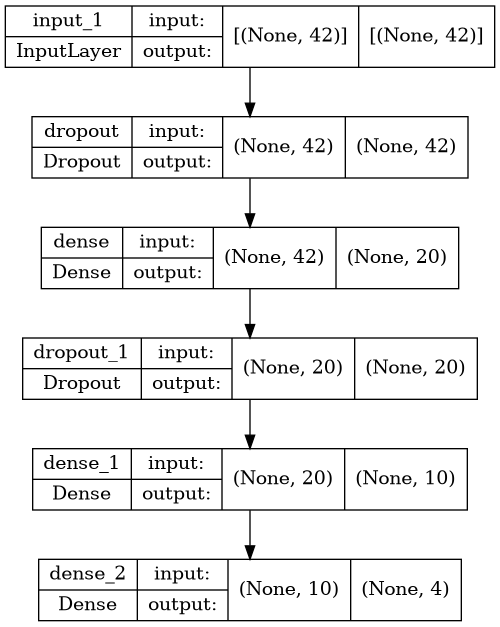

In [10]:
from tensorflow.keras.utils import plot_model
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [12]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [13]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
10/29 [=========>....................] - ETA: 0s - loss: 1.6254 - accuracy: 0.2328 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 2s 13ms/step - loss: 1.5297 - accuracy: 0.2407 - val_loss: 1.3568 - val_accuracy: 0.2949
Epoch 2/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.4325 - accuracy: 0.2578
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 1.3804 - accuracy: 0.2914 - val_loss: 1.2861 - val_accuracy: 0.4461
Epoch 3/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.3505 - accuracy: 0.2656
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 1.2958 - accuracy: 0.3563 - val_loss: 1.1987 - val_accuracy: 0.5347
Epoch 4/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.2994 - accuracy: 0.3594

 1/29 [>.............................] - ETA: 0s - loss: 0.6924 - accuracy: 0.7109
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.7398 - accuracy: 0.6891 - val_loss: 0.4530 - val_accuracy: 0.9123
Epoch 29/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.7684 - accuracy: 0.6719
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.7293 - accuracy: 0.6805 - val_loss: 0.4443 - val_accuracy: 0.9173
Epoch 30/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.7445 - accuracy: 0.6406
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.7334 - accuracy: 0.6858 - val_loss: 0.4313 - val_accuracy: 0.9131
Epoch 31/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.7931 - accuracy: 0.6328
Epoch 31

 1/29 [>.............................] - ETA: 0s - loss: 0.6726 - accuracy: 0.7578
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.7499 - val_loss: 0.3049 - val_accuracy: 0.9599
Epoch 56/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.7067 - accuracy: 0.7266
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.6045 - accuracy: 0.7602 - val_loss: 0.2996 - val_accuracy: 0.9557
Epoch 57/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5786 - accuracy: 0.7969
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.6073 - accuracy: 0.7571 - val_loss: 0.2965 - val_accuracy: 0.9624
Epoch 58/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6517 - accuracy: 0.7734
Epoch 58

 1/29 [>.............................] - ETA: 0s - loss: 0.5536 - accuracy: 0.7500
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.5595 - accuracy: 0.7724 - val_loss: 0.2564 - val_accuracy: 0.9691
Epoch 83/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5140 - accuracy: 0.8047
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5524 - accuracy: 0.7755 - val_loss: 0.2471 - val_accuracy: 0.9716
Epoch 84/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5522 - accuracy: 0.7656
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.7755 - val_loss: 0.2405 - val_accuracy: 0.9716
Epoch 85/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5975 - accuracy: 0.7500
Epoch 85

 1/29 [>.............................] - ETA: 0s - loss: 0.6277 - accuracy: 0.7656
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.5323 - accuracy: 0.7944 - val_loss: 0.2169 - val_accuracy: 0.9741
Epoch 110/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5998 - accuracy: 0.7656
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.7986 - val_loss: 0.2202 - val_accuracy: 0.9741
Epoch 111/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5227 - accuracy: 0.7812
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.5132 - accuracy: 0.7997 - val_loss: 0.2120 - val_accuracy: 0.9741
Epoch 112/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5575 - accuracy: 0.7891
Ep

Epoch 136/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.3425 - accuracy: 0.8594
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.8033 - val_loss: 0.2006 - val_accuracy: 0.9674
Epoch 137/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5175 - accuracy: 0.7812
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.5124 - accuracy: 0.8011 - val_loss: 0.2052 - val_accuracy: 0.9741
Epoch 138/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4713 - accuracy: 0.8281
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.8134 - val_loss: 0.2001 - val_accuracy: 0.9766
Epoch 139/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5706 - accu

Epoch 163/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5214 - accuracy: 0.8828
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.4798 - accuracy: 0.8159 - val_loss: 0.2007 - val_accuracy: 0.9691
Epoch 164/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4549 - accuracy: 0.8125
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.8164 - val_loss: 0.1947 - val_accuracy: 0.9741
Epoch 165/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.3741 - accuracy: 0.8672
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.4785 - accuracy: 0.8139 - val_loss: 0.1984 - val_accuracy: 0.9766
Epoch 166/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4044 - accu

Epoch 190/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5309 - accuracy: 0.8281
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.8159 - val_loss: 0.1890 - val_accuracy: 0.9733
Epoch 191/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5011 - accuracy: 0.7812
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.8095 - val_loss: 0.1863 - val_accuracy: 0.9741
Epoch 192/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8672
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.4621 - accuracy: 0.8206 - val_loss: 0.1914 - val_accuracy: 0.9699
Epoch 193/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.7018 - accu

In [14]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 1ms/step - loss: 0.1865 - accuracy: 0.9733


In [15]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [16]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.6139061e-01 3.8021911e-02 5.6139292e-04 2.6085407e-05]
0


# Confusion matrix

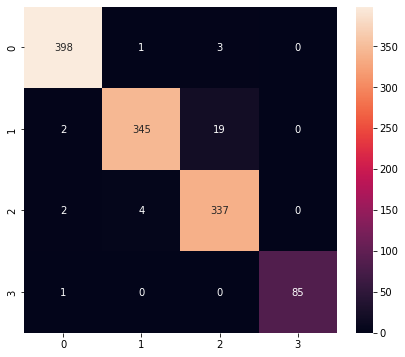

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       402
           1       0.99      0.94      0.96       366
           2       0.94      0.98      0.96       343
           3       1.00      0.99      0.99        86

    accuracy                           0.97      1197
   macro avg       0.98      0.98      0.98      1197
weighted avg       0.97      0.97      0.97      1197



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [18]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [19]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

2022-06-10 12:20:45.955378: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpsnzwnpfc/assets


2022-06-10 12:20:47.886299: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-06-10 12:20:47.886348: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-06-10 12:20:47.887595: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpsnzwnpfc
2022-06-10 12:20:47.889691: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-06-10 12:20:47.889711: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /tmp/tmpsnzwnpfc
2022-06-10 12:20:47.895145: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-06-10 12:20:48.025915: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmpsnzwnpfc
2022-06-10 12:20:48.056205: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { serve }; Status: success: OK. Took 168614 

6416

# Inference test

In [20]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [21]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [22]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [23]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 291 µs, sys: 56 µs, total: 347 µs
Wall time: 624 µs


In [24]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.6139061e-01 3.8021922e-02 5.6139240e-04 2.6085481e-05]
0


In [25]:
import sklearn

In [26]:
print("Classification accuracyon test dataset : ", sklearn.metrics.accuracy_score(y_test,y_pred) )

Classification accuracyon test dataset :  0.9732664995822891
